In [1]:
import os

import pandas as pd
import numpy as np

from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

In [2]:
ranks = {}
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [3]:
df = pd.read_csv("../datasets/austin_housing/processed_austin_housing.csv")
df.head()

,zipcode,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,hasGarage,hasSpa,hasView,homeType,...,numOfWindowFeatures,lotSizeSqFt,livingAreaSqFt,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories
0,-4.019137,1.433803,1.362892,-0.265248,0.570097,0.945895,0.904299,-0.292941,-0.543043,0.183428,...,1.620901,-0.851823,0.399818,-0.535249,-1.673595,-0.533854,-0.492151,0.300632,0.658444,2
1,-4.019137,1.454849,1.379193,-0.265248,0.570097,0.945895,0.904299,-0.292941,-0.543043,0.183428,...,-0.426958,-0.732281,-0.422348,-0.410445,-1.673595,-0.533854,-0.492151,-0.647765,0.658444,1
2,-4.019137,1.218441,1.638033,-0.265248,-0.909113,0.945895,-1.105829,-0.292941,-0.543043,0.183428,...,-0.426958,0.404743,-0.708576,-0.597651,-1.494404,-0.396030,-0.492151,-0.647765,-0.518146,1
3,-4.019137,1.449066,1.379644,-0.265248,0.570097,0.945895,0.904299,-0.292941,-0.543043,0.183428,...,-0.426958,-0.792052,-0.511177,-0.410445,-1.673595,-0.533854,-0.492151,-0.647765,-0.518146,1
4,-4.019137,1.503275,1.436293,-0.265248,-0.909113,0.945895,-1.105829,-0.292941,-0.543043,0.183428,...,-0.426958,-0.372968,-0.063082,-0.660053,-0.956832,-0.043812,-0.492151,0.300632,-0.518146,2


In [4]:
X = df.copy()
y = X.pop("latestPrice")
colnames_car = X.columns
colnames = X.columns

In [5]:
model = DecisionTreeRegressor()
model.fit(X, y)

DecisionTreeRegressor()

Feature: 0, Score: 0.09149
Feature: 1, Score: 0.04225
Feature: 2, Score: 0.06716
Feature: 3, Score: 0.00115
Feature: 4, Score: 0.00330
Feature: 5, Score: 0.01842
Feature: 6, Score: 0.00046
Feature: 7, Score: 0.00640
Feature: 8, Score: 0.00140
Feature: 9, Score: 0.00419
Feature: 10, Score: 0.00197
Feature: 11, Score: 0.03537
Feature: 12, Score: 0.01416
Feature: 13, Score: 0.00587
Feature: 14, Score: 0.00553
Feature: 15, Score: 0.00614
Feature: 16, Score: 0.00377
Feature: 17, Score: 0.00122
Feature: 18, Score: 0.00625
Feature: 19, Score: 0.51880
Feature: 20, Score: 0.01170
Feature: 21, Score: 0.04167
Feature: 22, Score: 0.03124
Feature: 23, Score: 0.00680
Feature: 24, Score: 0.06659
Feature: 25, Score: 0.00421
Feature: 26, Score: 0.00249


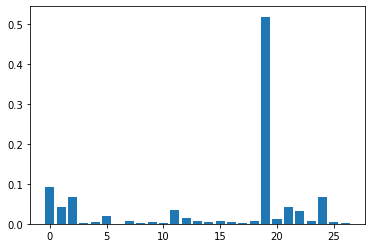

In [6]:
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [7]:
cart = DecisionTreeRegressor()
cart.fit(X,y)
ranks["CART"] = ranking(cart.feature_importances_, colnames);
ranks

{'CART': {'zipcode': 0.18,
  'latitude': 0.08,
  'longitude': 0.08,
  'propertyTaxRate': 0.0,
  'garageSpaces': 0.01,
  'hasAssociation': 0.03,
  'hasGarage': 0.0,
  'hasSpa': 0.0,
  'hasView': 0.0,
  'homeType': 0.0,
  'parkingSpaces': 0.0,
  'yearBuilt': 0.08,
  'numPriceChanges': 0.03,
  'numOfAppliances': 0.07,
  'numOfParkingFeatures': 0.01,
  'numOfPatioAndPorchFeatures': 0.01,
  'numOfSecurityFeatures': 0.0,
  'numOfWindowFeatures': 0.0,
  'lotSizeSqFt': 0.01,
  'livingAreaSqFt': 1.0,
  'avgSchoolDistance': 0.03,
  'avgSchoolRating': 0.08,
  'avgSchoolSize': 0.06,
  'MedianStudentsPerTeacher': 0.01,
  'numOfBathrooms': 0.13,
  'numOfBedrooms': 0.01,
  'numOfStories': 0.0}}

In [8]:
decimalrank_df = pd.DataFrame()

# Join preranks in dataframe
for method_name, rank_list in ranks.items():
    df_Temp = pd.DataFrame(data = {method_name:pd.Series(rank_list)})
    decimalrank_df = pd.concat([decimalrank_df,df_Temp ], axis=1)

rank_df = pd.DataFrame()
# Create new integer ranks
for method_name, rank_list in ranks.items():
    rank_df[method_name] = decimalrank_df[method_name].rank(ascending=False)

rank_df['feature_name'] = rank_df.index
rank_df

,CART,feature_name
zipcode,2.0,zipcode
latitude,5.5,latitude
longitude,5.5,longitude
propertyTaxRate,23.0,propertyTaxRate
garageSpaces,15.5,garageSpaces
hasAssociation,11.0,hasAssociation
hasGarage,23.0,hasGarage
hasSpa,23.0,hasSpa
hasView,23.0,hasView
homeType,23.0,homeType


In [9]:
rank_df.to_csv('../data/austin_housing_featureranks_CART.csv', sep=';',index=False)